In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode as stats_mode
from scipy.stats import levene

from pingouin import anova
from scipy.stats import chi2_contingency
import statsmodels.api as sm
sns.set_theme()

%matplotlib inline
#for Linear Regression: https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html


__Assignment__
1.	Critically apply descriptive statistics to summarise the entire 2021 dataset. 
2.	Interpret and critically discuss your descriptive statistics findings and present preliminary conclusions about university performance. 
3.	Critically apply hypothesis testing to examine differences/relationships that you consider relevant for making decisions on university performance. Develop hypotheses from your preliminary analysis, wider research and thinking and test these using the data set given above by the statistical techniques listed below at a significance level of 5%. Explain why the proposed hypotheses can be appropriately tested by these statistical techniques. Also, conclude with your decision based on your hypothesis.

- Chi-Square test
- One Way ANOVA test 
- Linear regression analysis. 


# 1. Descriptive Statistics to summarize the entire 2021 dataset

In [2]:
df = pd.read_excel("Sample_dataset_for_CW2_Complete_University_Guide_University_League_Table_2021.xls")

In [3]:
df

,Rank,Institution,Entry Standards,Student Satisfaction,Research Quality,Research Intensity,Graduate Prospects,Student-Staff Ratio,Academic Services Spend,Facilities Spend,Good Honours,Degree Completion,Overall Score
0,1,Cambridge,212,NaN,3.33,0.95,86.7,11.2,2718,1043,92.9,98.8,1000
1,2,Oxford,205,NaN,3.34,0.87,83.4,10.3,2842,599,94.2,98.1,992
2,3,St Andrews,211,4.34,3.13,0.82,79.7,11.2,2650,746,89.3,95.0,959
3,4,London School of Economics,168,3.82,3.35,0.85,86.1,11.9,2051,853,92.2,97.2,941
4,5,Imperial College London,190,4.02,3.36,0.92,90.4,11.1,2982,755,92.9,96.8,915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,Wrexham Glyndŵr,100,4.02,2.15,0.16,63.1,19.4,1334,559,71.0,74.2,380
126,127,Bolton,110,4.22,2.04,0.20,56.5,14.4,1395,432,60.4,72.2,373
127,128,Plymouth Marjon,111,4.23,NaN,NaN,63.6,20.5,996,720,73.8,79.0,363
128,129,Suffolk,103,4.00,NaN,NaN,64.2,16.7,1961,478,71.0,72.4,360


## Descriptive

In [4]:
stats_descriptive = df.describe().drop(labels = "Rank", axis = 1)
stats_descriptive.drop("count", axis = 0)

,Entry Standards,Student Satisfaction,Research Quality,Research Intensity,Graduate Prospects,Student-Staff Ratio,Academic Services Spend,Facilities Spend,Good Honours,Degree Completion,Overall Score
mean,134.238462,4.044766,2.699365,0.469127,75.646154,15.900000,1715.500000,684.138462,76.258462,84.696154,626.146154
std,26.058611,0.091065,0.410784,0.282106,7.597441,2.471198,432.870467,270.026635,7.551033,7.341022,146.916319
min,93.000000,3.800000,1.400000,0.070000,56.500000,10.300000,884.000000,189.000000,58.200000,58.500000,315.000000
25%,116.000000,4.000000,2.382500,0.230000,70.200000,14.400000,1413.500000,505.250000,71.300000,80.150000,527.750000
50%,126.000000,4.050000,2.720000,0.330000,75.900000,15.650000,1661.500000,674.000000,75.600000,84.150000,611.000000
75%,151.000000,4.100000,3.050000,0.760000,81.475000,17.475000,1960.250000,795.000000,81.725000,90.550000,730.500000
max,212.000000,4.340000,3.360000,0.950000,94.000000,24.200000,2982.000000,1939.000000,94.200000,98.800000,1000.000000


<Figure size 600x400 with 0 Axes>

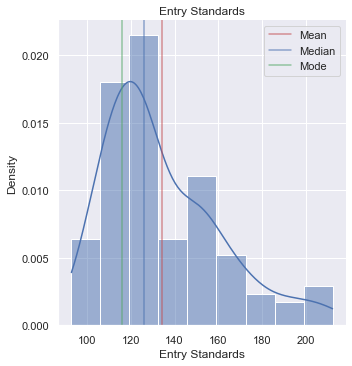

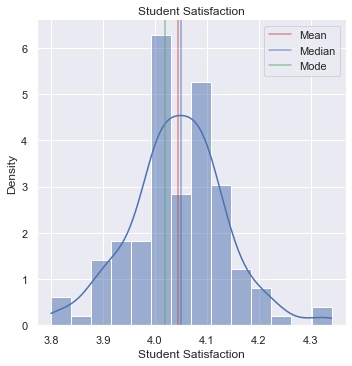

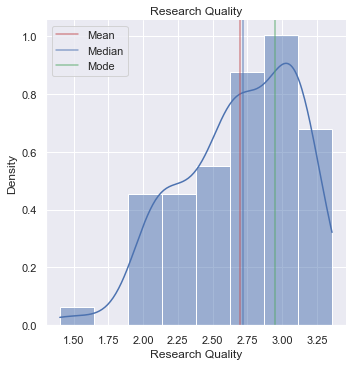

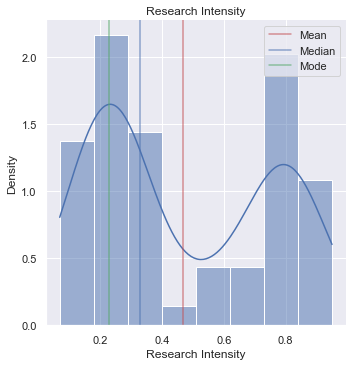

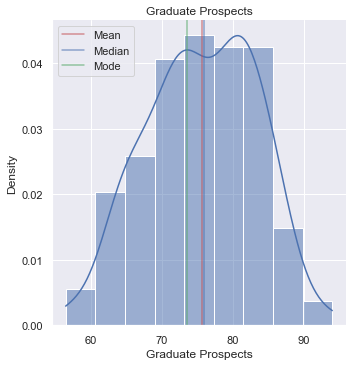

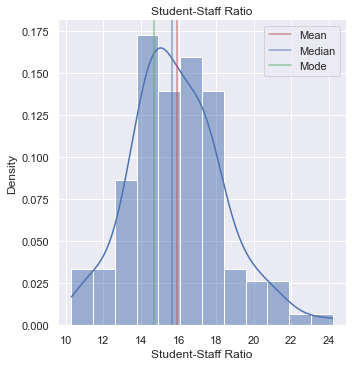

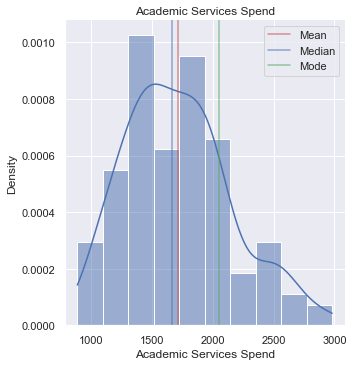

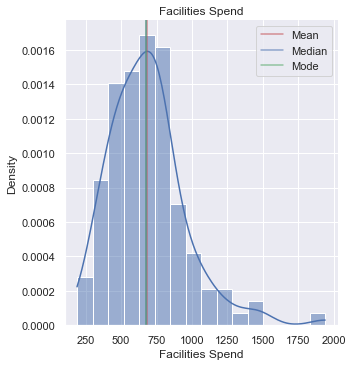

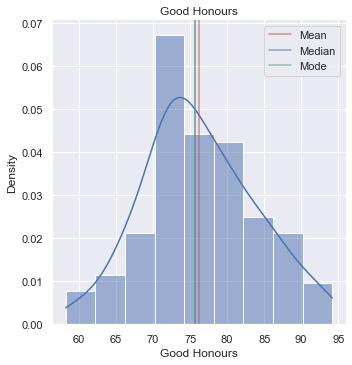

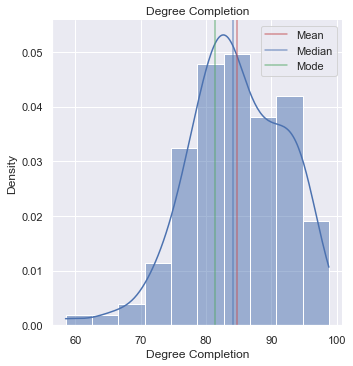

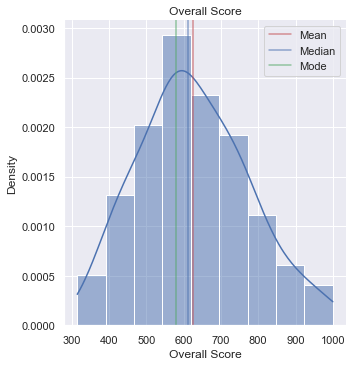

In [5]:
colors = ['r', 'b', 'g']
for index, value in enumerate(df.columns):
    if value not in ["Rank", "Institution"]:
        mean = df[value].mean()
        mode = stats_mode(df[value])
        median = df[value].median()

        plt.figure(index, dpi = 100)
        sns.displot(
            data = df[value],
            kde = True,
            stat = 'density',
            **{'bins': 'auto'}
            )
        
        plt.axvline(
            x = mean, 
            label = "Mean",
            alpha = 0.6,
            c = colors[0])
        plt.axvline(
            x = median, 
            label = "Median",
            alpha = 0.6,
            c = colors[1])
        plt.axvline(
            x = mode, 
            label = "Mode",
            alpha = 0.6,
            c = colors[2])
        plt.title(value)
        plt.legend()
        # plt.savefig(fname = f"Plots\\Distplot_{value}.png", dpi = 500, bbox_inches = "tight")

# 2. Interpet and critically discuss your descripitve statistics finding and present prelimianry conlcusions about universtiy performance

# 3. Hypothesis testing to examine differences/relationships that I consider relevant for making decisions on university perfomance

- Chi-Square test
- One Way ANOVA test 
- Linear regression analysis. 

## Chi-Square

In [6]:
df_chi = df[["Student Satisfaction" , "Research Quality"]].dropna()
df_chi.head()

,Student Satisfaction,Research Quality
2,4.34,3.13
3,3.82,3.35
4,4.02,3.36
5,4.21,2.95
6,4.01,3.14


In [7]:
cat_studentSatis = np.array(df_chi["Student Satisfaction"])
bins = np.array([3.5, 4.10, 4.35])
inds = np.digitize(cat_studentSatis, bins = bins, right = False)
for n in range(cat_studentSatis.size):
  print(bins[inds[n] - 1], "<=", cat_studentSatis[n], "<", bins[inds[n]])


4.1 <= 4.34 < 4.35
3.5 <= 3.82 < 4.1
3.5 <= 4.02 < 4.1
4.1 <= 4.21 < 4.35
3.5 <= 4.01 < 4.1
3.5 <= 4.07 < 4.1
3.5 <= 4.09 < 4.1
3.5 <= 3.95 < 4.1
3.5 <= 4.09 < 4.1
3.5 <= 4.06 < 4.1
3.5 <= 4.0 < 4.1
3.5 <= 4.02 < 4.1
3.5 <= 3.87 < 4.1
3.5 <= 4.06 < 4.1
3.5 <= 3.98 < 4.1
3.5 <= 4.03 < 4.1
3.5 <= 4.0 < 4.1
3.5 <= 3.89 < 4.1
3.5 <= 4.0 < 4.1
4.1 <= 4.14 < 4.35
3.5 <= 4.02 < 4.1
3.5 <= 4.08 < 4.1
3.5 <= 4.02 < 4.1
4.1 <= 4.1 < 4.35
3.5 <= 3.97 < 4.1
3.5 <= 4.09 < 4.1
3.5 <= 4.0 < 4.1
3.5 <= 3.99 < 4.1
4.1 <= 4.17 < 4.35
3.5 <= 4.09 < 4.1
3.5 <= 4.03 < 4.1
3.5 <= 4.0 < 4.1
3.5 <= 3.9 < 4.1
3.5 <= 4.01 < 4.1
3.5 <= 3.93 < 4.1
3.5 <= 3.99 < 4.1
3.5 <= 3.92 < 4.1
3.5 <= 3.95 < 4.1
3.5 <= 4.08 < 4.1
4.1 <= 4.1 < 4.35
3.5 <= 4.0 < 4.1
4.1 <= 4.13 < 4.35
3.5 <= 3.98 < 4.1
4.1 <= 4.12 < 4.35
3.5 <= 3.99 < 4.1
4.1 <= 4.17 < 4.35
3.5 <= 3.98 < 4.1
3.5 <= 4.04 < 4.1
3.5 <= 3.9 < 4.1
3.5 <= 4.05 < 4.1
3.5 <= 4.06 < 4.1
3.5 <= 4.07 < 4.1
3.5 <= 4.08 < 4.1
4.1 <= 4.13 < 4.35
3.5 <= 4.01 < 4.1
4.1 <= 4.3

In [8]:
# df_chi.to_csv("Chi_square.csv")

In [9]:
#Category creation Research Quality
category_researchquality = list(map(lambda x: np.floor(x), np.array(df_chi["Research Quality"])))
df_chi["Category_RQ"] = category_researchquality
df_chi.drop("Research Quality", axis = 1, inplace = True)

df_chi["Category_GP"] = inds
df_chi.drop("Student Satisfaction", axis = 1, inplace = True)

In [10]:
df_chi_test = pd.crosstab(
    df_chi.Category_RQ,
    df_chi.Category_GP,
    colnames= ["SS Stars:"],
    rownames= ["RQ Starts:"]
)
df_chi_test.columns = pd.Index(
    ["3.50 <= X < 4.10 (1)", "4.10 <= X < 4.35 (2)"],
    name = "SS Stars:"
)
df_chi_test

SS Stars:,3.50 <= X < 4.10 (1),4.10 <= X < 4.35 (2)
RQ Starts:,,
1.0,2,3
2.0,58,25
3.0,33,3


In [11]:
chi_test_ = chi2_contingency(
    observed= df_chi_test,
    correction= False,
    lambda_=1
)

chi_test_results = {
    "Chi-Square" : [chi_test_[0]], 
    "DoF" : [chi_test_[2]],
    "P-Value" : [chi_test_[1]],
}

pd.DataFrame(chi_test_results)


,Chi-Square,DoF,P-Value
0,9.760643,2,0.007595


In [12]:
print("A - 2 cells have expected count less than 5. The minimum expected count is 1.25")

A - 2 cells have expected count less than 5. The minimum expected count is 1.25


In [13]:
# Expected Values
chi_square_expected = pd.DataFrame(chi_test_[3], columns = ["Expected Values (1)", "Expected Values (2)"], index = df_chi_test.index)

df_chi_test[chi_square_expected.columns[0]] = chi_square_expected[chi_square_expected.columns[0]]
df_chi_test[chi_square_expected.columns[1]] = chi_square_expected[chi_square_expected.columns[1]]

df_chi_test


SS Stars:,3.50 <= X < 4.10 (1),4.10 <= X < 4.35 (2),Expected Values (1),Expected Values (2)
RQ Starts:,,,,
1.0,2,3,3.75,1.25
2.0,58,25,62.25,20.75
3.0,33,3,27.00,9.00


# ANOVA Redesign

In [14]:
df_a = df[["Student Satisfaction", "Degree Completion", "Research Quality"]].dropna()
df_a = df_a.reset_index(drop = True)

In [15]:
def cat_research(array):
    cat_lst = []
    cat_dic = {
        1 : "Low", 
        2 : "Moderate", 
        3 : "High"
    }
    
    for i in array:
        z = np.floor(i)
        cat_lst.append(cat_dic.get(z))
    
    return cat_lst

def cat_satisfaction(array):
    cat_lst = []
    cat_dic = {
        1 : "Very Bad",
        2 : "Bad",
        3 : "Neutral",
        4 : "Good",
        5 : "Very Good"
    }

    for i in array:
        z = np.floor(i)
        cat_lst.append(cat_dic.get(z))
    
    return cat_lst

In [16]:
df_a["Student Satisfaction (C)"] = cat_satisfaction(df_a["Student Satisfaction"])
df_a["Research Quality (C)"] = cat_research(df_a["Research Quality"])

df_a.drop(["Student Satisfaction", "Research Quality"], axis = 1, inplace = True)
df_a.drop(df_a.columns[1], axis = 1, inplace = True)

## Levene Test for homogenity of variance

In [17]:
a = df_a["Degree Completion"].where(df_a["Research Quality (C)"] == "High").dropna()
b = df_a["Degree Completion"].where(df_a["Research Quality (C)"] == "Moderate").dropna()
c = df_a["Degree Completion"].where(df_a["Research Quality (C)"] == "Low").dropna()

stats, p = levene(a, b, c, center = "mean")

levene_results = {
    "Levene Statistic" : [stats],
    "P-Value" : [p]
}

pd.DataFrame(data = levene_results)

,Levene Statistic,P-Value
0,2.019738,0.137139


## Descriptives

In [18]:
z = df_a.groupby(by = "Research Quality (C)").describe(include = 'all')
z

Degree Completion                                     \
                                 count       mean       std   min     25%   
Research Quality (C)                                                        
High                              36.0  91.580556  3.982305  80.1  89.625   
Low                                5.0  84.520000  7.046772  77.9  78.600   
Moderate                          83.0  81.773494  6.115635  58.5  78.400   

                                          
                        50%    75%   max  
Research Quality (C)                      
High                  92.35  94.55  97.2  
Low                   82.80  88.90  94.4  
Moderate              82.20  84.90  94.3

## ANOVA Results

In [19]:
anova_results = anova(
    data = df_a, 
    dv = df_a.columns[0], 
    between = df_a.columns[1],
    detailed = True
)
anova_results.Source = ["Between Groups", "Within Groups"]
anova_results.drop("np2", axis = 1, inplace = True)
anova_results.columns = list(anova_results.columns[:-1]) + ["P-Value"]
anova_results
# anova_results.to_latex(na_rep = "-")

,Source,SS,DF,MS,F,P-Value
0,Between Groups,2415.201263,2,1207.600632,38.245557,1.342418e-13
1,Within Groups,3820.566076,121,31.574926,NaN,NaN


# Linear Regression

In [20]:
df_lin = df[["Academic Services Spend", "Facilities Spend"]].dropna()

In [44]:
col_names = list(map(lambda x: x.replace(" ", "_"), df_lin.columns))
df_lin.columns = col_names

In [22]:


model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     Academic Services Spend   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                 -0.007
Method:                      Least Squares   F-statistic:                    0.1604
Date:                     Tue, 16 Nov 2021   Prob (F-statistic):              0.689
Time:                             17:03:36   Log-Likelihood:                -973.04
No. Observations:                      130   AIC:                             1950.
Df Residuals:                          128   BIC:                             1956.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

C:\Users\pwisl\AppData\Local\Temp/ipykernel_13420/2916982333.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = f"Plots\\Regplot_Academic-Facilities.png", dpi = 500, papertype = "executive", bbox_inches = "tight")


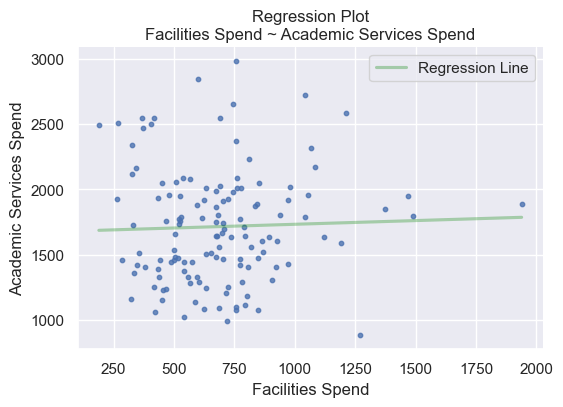

In [23]:
fig = plt.figure(dpi = 100)
sns.regplot(
    x = "Facilities Spend",
    y = "Academic Services Spend",
    data = df_lin,
    fit_reg = True,
    ci = 0,
    scatter= True,
    scatter_kws = {'s' : 10},
    line_kws= {'color' : 'green', 'alpha': 0.3, 'label' : "Regression Line"}
    )

sns.despine()
plt.title("Regression Plot\nFacilities Spend ~ Academic Services Spend")
plt.legend()
plt.savefig(fname = f"Plots\\Regplot_Academic-Facilities.png", dpi = 500, papertype = "executive", bbox_inches = "tight")

In [71]:
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm
formula = "Academic_Services_Spend ~ Facilities_Spend"
anova_linear = ols(formula, data = df_lin).fit()


reg_anova = anova_lm(anova_linear)
reg_anova

,df,sum_sq,mean_sq,F,PR(>F)
Facilities_Spend,1.0,3.025979e+04,30259.791232,0.160441,0.689419
Residual,128.0,2.414135e+07,188604.318037,NaN,NaN


### Linear Assumptions

In [24]:
from scipy.stats import pearsonr

pearsonr(df_lin["Academic Services Spend"], df_lin["Facilities Spend"])

(0.035381818636899334, 0.6894189490664432)

In [25]:
from scipy.stats import spearmanr
spearmanr(df_lin)

SpearmanrResult(correlation=0.043857133498727593, pvalue=0.6202774260863149)

In [26]:
pearsonr(results.resid, df_lin["Facilities Spend"]) 

(5.984795992119984e-16, 0.9999999999999885)

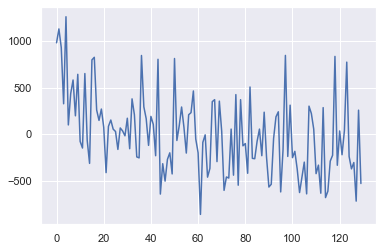

In [27]:
plt.plot(results.resid)

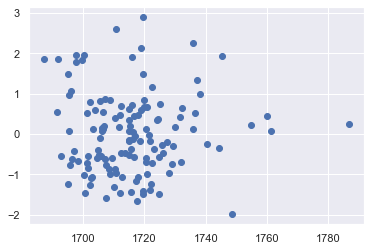

In [28]:
plt.scatter(results.fittedvalues, results.resid_pearson)

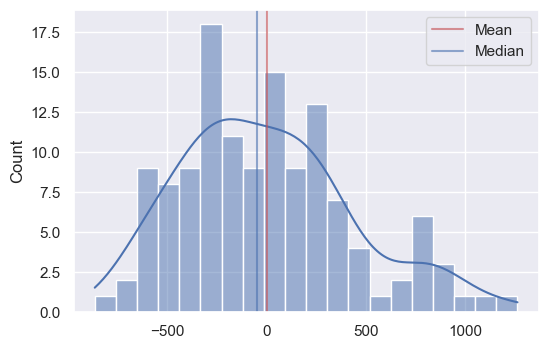

In [29]:

plt.figure(dpi = 100)
sns.histplot(results.resid, kde= True, bins = 20, )

plt.axvline(
    x = results.resid.mean(), 
    label = "Mean",
    alpha = 0.6,
    c = colors[0])
plt.axvline(
    x = results.resid.median(), 
    label = "Median",
    alpha = 0.6,
    c = colors[1])
# plt.axvline(
#     x = mode_correct(results.resid).mode, 
#     label = "Mode",
#     alpha = 0.6,
#     c = colors[2])
plt.legend()

In [30]:
print("The Residual has no mode.")

The Residual has no mode.
